# Data Pre-processing - Primary Dataset

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import sklearn
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from string import punctuation
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.feature_selection import VarianceThreshold, RFE
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
import numpy.testing as testing
import seaborn as sns
import plotly.express as px


# Download necessary NLTK data files
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('vader_lexicon')

In [3]:
# Reading the CSV for dataset 1
try:
    df1 = pd.read_csv("Airline_Sentiment.csv" , encoding='ISO-8859-1')
    print("CSV file loaded successfully.")
except FileNotFoundError:
    print("The specified file was not found.")

# Display the first few rows of the dataframe to verify
df1.head()

CSV file loaded successfully.


,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,681448150,False,finalized,3,2/25/15 5:24,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/15 11:35,5.703060e+17,NaN,Eastern Time (US & Canada)
1,681448153,False,finalized,3,2/25/15 1:53,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
2,681448156,False,finalized,3,2/25/15 10:01,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/15 11:15,5.703010e+17,Lets Play,Central Time (US & Canada)
3,681448158,False,finalized,3,2/25/15 3:05,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
4,681448159,False,finalized,3,2/25/15 5:50,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/15 11:14,5.703010e+17,NaN,Pacific Time (US & Canada)


In [4]:
# Get the last 5 rows
df1.tail()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
14635,681679794,False,finalized,3,2/25/15 19:46,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2/22/15 12:01,5.695880e+17,NaN,NaN
14636,681679795,False,finalized,3,2/25/15 19:14,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2/22/15 11:59,5.695870e+17,Texas,NaN
14637,681679796,False,finalized,3,2/25/15 19:04,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2/22/15 11:59,5.695870e+17,"Nigeria,lagos",NaN
14638,681679797,False,finalized,3,2/25/15 18:59,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2/22/15 11:59,5.695870e+17,New Jersey,Eastern Time (US & Canada)
14639,681679798,False,finalized,3,2/25/15 19:06,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2/22/15 11:58,5.695870e+17,"dallas, TX",NaN


In [5]:
#Show the rows and columns values
df1.shape

(14640, 20)

In [6]:
df1.describe

<bound method NDFrame.describe of         _unit_id  _golden _unit_state  _trusted_judgments _last_judgment_at  \
0      681448150    False   finalized                   3      2/25/15 5:24   
1      681448153    False   finalized                   3      2/25/15 1:53   
2      681448156    False   finalized                   3     2/25/15 10:01   
3      681448158    False   finalized                   3      2/25/15 3:05   
4      681448159    False   finalized                   3      2/25/15 5:50   
...          ...      ...         ...                 ...               ...   
14635  681679794    False   finalized                   3     2/25/15 19:46   
14636  681679795    False   finalized                   3     2/25/15 19:14   
14637  681679796    False   finalized                   3     2/25/15 19:04   
14638  681679797    False   finalized                   3     2/25/15 18:59   
14639  681679798    False   finalized                   3     2/25/15 19:06   

      airline_sen

In [7]:
#Display the columns names
df1.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'airline_sentiment',
       'airline_sentiment:confidence', 'negativereason',
       'negativereason:confidence', 'airline', 'airline_sentiment_gold',
       'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [8]:
# Define a dictionary with the old column names as keys and the new column names as values
new_column_names = {
    '_unit_id': 'Unit_Id',
    '_golden': 'Golden',
    '_unit_state': 'Unit_State',
    '_trusted_judgments': 'Trusted_Judgments',
    '_last_judgment_at': 'Last_JudgmentDate',
    'airline_sentiment': 'Airline_Sentiment',
    'airline_sentiment:confidence': 'Airline_SentimentConfidence',
    'negativereason': 'Negative_Reason',
    'negativereason:confidence': 'Negative_ReasonConfidence',
    'airline': 'Airline',
    'airline_sentiment_gold': 'Airline_SentimentGold',
    'name': 'Name',
    'negativereason_gold': 'Negative_ReasonGold',
    'retweet_count': 'Retweet_Count',
    'text': 'Text',
    'tweet_coord': 'Tweet_Coord',
    'tweet_created': 'Tweet_Created',
    'tweet_id': 'Tweet_Id',
    'tweet_location': 'Tweet_Location',
    'user_timezone': 'User_Timezone'

}

# Rename the columns
df1.rename(columns=new_column_names, inplace=True)

# Print the updated column names
print("Updated column names:")
print(df1.columns)


Updated column names:
Index(['Unit_Id', 'Golden', 'Unit_State', 'Trusted_Judgments',
       'Last_JudgmentDate', 'Airline_Sentiment', 'Airline_SentimentConfidence',
       'Negative_Reason', 'Negative_ReasonConfidence', 'Airline',
       'Airline_SentimentGold', 'Name', 'Negative_ReasonGold', 'Retweet_Count',
       'Text', 'Tweet_Coord', 'Tweet_Created', 'Tweet_Id', 'Tweet_Location',
       'User_Timezone'],
      dtype='object')


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unit_Id                      14640 non-null  int64  
 1   Golden                       14640 non-null  bool   
 2   Unit_State                   14640 non-null  object 
 3   Trusted_Judgments            14640 non-null  int64  
 4   Last_JudgmentDate            14584 non-null  object 
 5   Airline_Sentiment            14640 non-null  object 
 6   Airline_SentimentConfidence  14640 non-null  float64
 7   Negative_Reason              9178 non-null   object 
 8   Negative_ReasonConfidence    10522 non-null  float64
 9   Airline                      14640 non-null  object 
 10  Airline_SentimentGold        40 non-null     object 
 11  Name                         14640 non-null  object 
 12  Negative_ReasonGold          32 non-null     object 
 13  Retweet_Count   

In [10]:
# Check the type of the column
df1.dtypes

Unit_Id                          int64
Golden                            bool
Unit_State                      object
Trusted_Judgments                int64
Last_JudgmentDate               object
Airline_Sentiment               object
Airline_SentimentConfidence    float64
Negative_Reason                 object
Negative_ReasonConfidence      float64
Airline                         object
Airline_SentimentGold           object
Name                            object
Negative_ReasonGold             object
Retweet_Count                    int64
Text                            object
Tweet_Coord                     object
Tweet_Created                   object
Tweet_Id                       float64
Tweet_Location                  object
User_Timezone                   object
dtype: object

In [11]:
# Check for missing values
df1.isna().sum()

Unit_Id                            0
Golden                             0
Unit_State                         0
Trusted_Judgments                  0
Last_JudgmentDate                 56
Airline_Sentiment                  0
Airline_SentimentConfidence        0
Negative_Reason                 5462
Negative_ReasonConfidence       4118
Airline                            0
Airline_SentimentGold          14600
Name                               0
Negative_ReasonGold            14608
Retweet_Count                      0
Text                               0
Tweet_Coord                    13621
Tweet_Created                      0
Tweet_Id                           0
Tweet_Location                  4733
User_Timezone                   4820
dtype: int64

# Dimensionality Reduction

In [12]:
# checking the percentage of missing values in each variable

df1. isnull().sum()/len(df1)*100

Unit_Id                         0.000000
Golden                          0.000000
Unit_State                      0.000000
Trusted_Judgments               0.000000
Last_JudgmentDate               0.382514
Airline_Sentiment               0.000000
Airline_SentimentConfidence     0.000000
Negative_Reason                37.308743
Negative_ReasonConfidence      28.128415
Airline                         0.000000
Airline_SentimentGold          99.726776
Name                            0.000000
Negative_ReasonGold            99.781421
Retweet_Count                   0.000000
Text                            0.000000
Tweet_Coord                    93.039617
Tweet_Created                   0.000000
Tweet_Id                        0.000000
Tweet_Location                 32.329235
User_Timezone                  32.923497
dtype: float64

In [13]:
#check if any are more than the threshold
null_percentages = df1. isnull(). sum()/len(df1)*100

# saving column names in a variable
features = df1.columns
feature = [ ]

for i in range(0,len(null_percentages)):
    if null_percentages[i] <= 20: #setting the threshold value, i.e 20%
        feature.append(features[i])

In [14]:
#check the percentage of rows that have null values

(df1.isnull().sum().sum()/(df1.shape[0]*df1.shape[1]))*100


21.18101092896175

In [15]:
# Remove columns with high missing values that are not necessary for analysis

try: 
    columns_to_drop = ['Negative_Reason', 'Negative_ReasonConfidence', 'Airline_SentimentGold','Negative_ReasonGold','Tweet_Coord', ]
    df1 = df1.drop(columns=columns_to_drop)
except: 
    print("Columns are either deleted earlier or not existing")

df1.head()

,Unit_Id,Golden,Unit_State,Trusted_Judgments,Last_JudgmentDate,Airline_Sentiment,Airline_SentimentConfidence,Airline,Name,Retweet_Count,Text,Tweet_Created,Tweet_Id,Tweet_Location,User_Timezone
0,681448150,False,finalized,3,2/25/15 5:24,neutral,1.0000,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2/24/15 11:35,5.703060e+17,NaN,Eastern Time (US & Canada)
1,681448153,False,finalized,3,2/25/15 1:53,positive,0.3486,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
2,681448156,False,finalized,3,2/25/15 10:01,neutral,0.6837,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2/24/15 11:15,5.703010e+17,Lets Play,Central Time (US & Canada)
3,681448158,False,finalized,3,2/25/15 3:05,negative,1.0000,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
4,681448159,False,finalized,3,2/25/15 5:50,negative,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2/24/15 11:14,5.703010e+17,NaN,Pacific Time (US & Canada)


In [16]:
# Further Clean the Data

# Drop rows with missing values
df1 = df1.dropna()

# Remove unnessary Characters
def remove_unnecessary_characters(text):
    content = re.sub(r'@', '', str(text))
    content = re.sub(r'<.*?#>', '', str(text))
    content = re.sub(r'[^a-zA-Z0-9\s]', '', str(text))
    content = re.sub(r'\s+', ' ', str(text)).strip()
    return content
df1['Text'] = df1['Text'].apply(remove_unnecessary_characters)

df1.head(100)

,Unit_Id,Golden,Unit_State,Trusted_Judgments,Last_JudgmentDate,Airline_Sentiment,Airline_SentimentConfidence,Airline,Name,Retweet_Count,Text,Tweet_Created,Tweet_Id,Tweet_Location,User_Timezone
2,681448156,False,finalized,3,2/25/15 10:01,neutral,0.6837,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2/24/15 11:15,5.703010e+17,Lets Play,Central Time (US & Canada)
6,681448165,False,finalized,3,2/25/15 8:11,positive,0.6745,Virgin America,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",2/24/15 11:13,5.703010e+17,San Francisco CA,Pacific Time (US & Canada)
7,681448167,False,finalized,3,2/25/15 2:11,neutral,0.6340,Virgin America,pilot,0,@VirginAmerica Really missed a prime opportuni...,2/24/15 11:12,5.703000e+17,Los Angeles,Pacific Time (US & Canada)
8,681448169,False,finalized,3,2/25/15 9:01,positive,0.6559,Virgin America,dhepburn,0,"@virginamerica Well, I didn'tÛ_but NOW I DO! :-D",2/24/15 11:11,5.703000e+17,San Diego,Pacific Time (US & Canada)
9,681448171,False,finalized,3,2/25/15 4:15,positive,1.0000,Virgin America,YupitsTate,0,"@VirginAmerica it was amazing, and arrived an ...",2/24/15 10:53,5.702950e+17,Los Angeles,Eastern Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,681448517,False,finalized,3,2/25/15 5:57,negative,1.0000,Virgin America,Gr8Fratsby,0,@VirginAmerica I'm disappointed that the agent...,2/22/15 5:51,5.694950e+17,"Washington, DC",Eastern Time (US & Canada)
166,681448520,False,finalized,3,2/25/15 3:50,neutral,1.0000,Virgin America,NewsSWA,0,@VirginAmerica Plans to Include Austin to its ...,2/22/15 5:02,5.694820e+17,FL410,Sydney
167,681448522,False,finalized,3,2/25/15 6:00,negative,1.0000,Virgin America,CSHangover,0,@VirginAmerica Is it normal to receive no repl...,2/22/15 4:43,5.694780e+17,Tokyo,Irkutsk
168,681448524,False,finalized,3,2/25/15 6:53,negative,1.0000,Virgin America,girlphotophilly,0,@VirginAmerica at Logan airport and waiting to...,2/22/15 3:39,5.694610e+17,"Philadelphia, Pa",Eastern Time (US & Canada)


In [17]:
df1.head()

,Unit_Id,Golden,Unit_State,Trusted_Judgments,Last_JudgmentDate,Airline_Sentiment,Airline_SentimentConfidence,Airline,Name,Retweet_Count,Text,Tweet_Created,Tweet_Id,Tweet_Location,User_Timezone
2,681448156,False,finalized,3,2/25/15 10:01,neutral,0.6837,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2/24/15 11:15,5.703010e+17,Lets Play,Central Time (US & Canada)
6,681448165,False,finalized,3,2/25/15 8:11,positive,0.6745,Virgin America,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",2/24/15 11:13,5.703010e+17,San Francisco CA,Pacific Time (US & Canada)
7,681448167,False,finalized,3,2/25/15 2:11,neutral,0.6340,Virgin America,pilot,0,@VirginAmerica Really missed a prime opportuni...,2/24/15 11:12,5.703000e+17,Los Angeles,Pacific Time (US & Canada)
8,681448169,False,finalized,3,2/25/15 9:01,positive,0.6559,Virgin America,dhepburn,0,"@virginamerica Well, I didn'tÛ_but NOW I DO! :-D",2/24/15 11:11,5.703000e+17,San Diego,Pacific Time (US & Canada)
9,681448171,False,finalized,3,2/25/15 4:15,positive,1.0000,Virgin America,YupitsTate,0,"@VirginAmerica it was amazing, and arrived an ...",2/24/15 10:53,5.702950e+17,Los Angeles,Eastern Time (US & Canada)


In [18]:
# Check again for missing values again
df1.isna().sum()

Unit_Id                        0
Golden                         0
Unit_State                     0
Trusted_Judgments              0
Last_JudgmentDate              0
Airline_Sentiment              0
Airline_SentimentConfidence    0
Airline                        0
Name                           0
Retweet_Count                  0
Text                           0
Tweet_Created                  0
Tweet_Id                       0
Tweet_Location                 0
User_Timezone                  0
dtype: int64

In [19]:
#check the percentage of rows that have null values

(df1.isnull().sum().sum()/(df1.shape[0]*df1.shape[1]))*100

0.0

In [20]:
df1.shape

(7729, 15)

In [21]:
# Clean and preprocess the DataFrame

# Convert date columns to datetime
df1['Last_JudgmentDate'] = pd.to_datetime(df1['Last_JudgmentDate'])
df1['Tweet_Created'] = pd.to_datetime(df1['Tweet_Created'])

# Standardize text columns (e.g., lowercase)
df1['Text'] = df1['Text'].str.lower()
# Remove @ from the text
df1['Text'] = df1['Text'].str.replace('@', '')

# Remove special characters
df1['Text'] = df1['Text'].str.replace('[^\w\s]', '', regex=True)  
# Display the cleaned DataFrame
df1.head()


C:\Users\olanr\AppData\Local\Temp\ipykernel_36888\3070645121.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['Last_JudgmentDate'] = pd.to_datetime(df1['Last_JudgmentDate'])
C:\Users\olanr\AppData\Local\Temp\ipykernel_36888\3070645121.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['Tweet_Created'] = pd.to_datetime(df1['Tweet_Created'])


,Unit_Id,Golden,Unit_State,Trusted_Judgments,Last_JudgmentDate,Airline_Sentiment,Airline_SentimentConfidence,Airline,Name,Retweet_Count,Text,Tweet_Created,Tweet_Id,Tweet_Location,User_Timezone
2,681448156,False,finalized,3,2015-02-25 10:01:00,neutral,0.6837,Virgin America,yvonnalynn,0,virginamerica i didnt today must mean i need t...,2015-02-24 11:15:00,5.703010e+17,Lets Play,Central Time (US & Canada)
6,681448165,False,finalized,3,2015-02-25 08:11:00,positive,0.6745,Virgin America,cjmcginnis,0,virginamerica yes nearly every time i fly vx t...,2015-02-24 11:13:00,5.703010e+17,San Francisco CA,Pacific Time (US & Canada)
7,681448167,False,finalized,3,2015-02-25 02:11:00,neutral,0.6340,Virgin America,pilot,0,virginamerica really missed a prime opportunit...,2015-02-24 11:12:00,5.703000e+17,Los Angeles,Pacific Time (US & Canada)
8,681448169,False,finalized,3,2015-02-25 09:01:00,positive,0.6559,Virgin America,dhepburn,0,virginamerica well i didntû_but now i do d,2015-02-24 11:11:00,5.703000e+17,San Diego,Pacific Time (US & Canada)
9,681448171,False,finalized,3,2015-02-25 04:15:00,positive,1.0000,Virgin America,YupitsTate,0,virginamerica it was amazing and arrived an ho...,2015-02-24 10:53:00,5.702950e+17,Los Angeles,Eastern Time (US & Canada)


In [22]:
numerical_cols = ['Trusted_Judgments', 'Airline_SentimentConfidence', 'Retweet_Count']
numerical_cols

['Trusted_Judgments', 'Airline_SentimentConfidence', 'Retweet_Count']

In [23]:
# Identify outliers using z-scores 

from scipy.stats import zscore

# Calculate z-scores for numerical columns
z_scores = df1[numerical_cols].apply(zscore)

# Identify outliers with z-scores > 3 or < -3
outliers = (z_scores > 3) | (z_scores < -3)

# Display columns with outliers
outlier_columns = outliers.any()
print("Columns with outliers:", outlier_columns[outlier_columns].index.tolist())

# Display the rows that contain outliers
outlier_rows = df1[outliers.any(axis=1)]
print("Rows with outliers:")
outlier_rows



Columns with outliers: ['Trusted_Judgments', 'Airline_SentimentConfidence', 'Retweet_Count']
Rows with outliers:


,Unit_Id,Golden,Unit_State,Trusted_Judgments,Last_JudgmentDate,Airline_Sentiment,Airline_SentimentConfidence,Airline,Name,Retweet_Count,Text,Tweet_Created,Tweet_Id,Tweet_Location,User_Timezone
114,681448404,False,finalized,3,2015-02-25 06:27:00,positive,0.3482,Virgin America,AdamJdubs,0,virginamerica come back to phl already we need...,2015-02-23 06:07:00,5.698610e+17,Earth,Eastern Time (US & Canada)
142,681448466,False,finalized,3,2015-02-25 08:47:00,neutral,0.3550,Virgin America,FiDiFamilies,0,virginamerica can you find us a flt out of lax...,2015-02-22 13:49:00,5.696150e+17,New York City,Eastern Time (US & Canada)
183,681448558,False,finalized,3,2015-02-25 07:14:00,positive,0.3579,Virgin America,miaerolinea,0,_ù_ rt virginamerica youûªve met your match go...,2015-02-21 18:09:00,5.693180e+17,Worldwide,Caracas
309,681448795,False,finalized,3,2015-02-25 07:30:00,neutral,0.3750,Virgin America,GabriellaDago,0,virginamerica is saving my sanity right now ht...,2015-02-20 07:54:00,5.688010e+17,New York City,Eastern Time (US & Canada)
349,681448837,False,finalized,3,2015-02-25 03:32:00,negative,0.3617,Virgin America,jamonholmgren,0,virginamerica its fine already done with my pu...,2015-02-19 13:18:00,5.685200e+17,"Vancouver, WA",Arizona
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14078,681679236,False,finalized,3,2015-02-25 19:09:00,positive,0.3691,American,lmaxwell11,0,americanair no worries even though i was talki...,2015-02-22 17:29:00,5.696700e+17,O.K.C.,Central Time (US & Canada)
14261,681679420,False,finalized,3,2015-02-25 19:38:00,positive,0.3642,American,jkhoey,1,americanair shoutout to the agent on duty now ...,2015-02-22 15:47:00,5.696450e+17,"New York, NY",Eastern Time (US & Canada)
14297,681679456,False,finalized,3,2015-02-25 18:57:00,positive,0.3611,American,lmaxwell11,0,americanair haha i had a boarding pass for 12b...,2015-02-22 15:32:00,5.696410e+17,O.K.C.,Central Time (US & Canada)
14518,681679677,False,in progress,2,2015-02-25 18:44:00,negative,1.0000,American,LIGal19,0,americanair i have no transportation to and go...,2015-02-22 13:07:00,5.696040e+17,"ÌÏT: 40.881241,-73.107717",Quito


In [24]:
#Removing Outliers
from scipy.stats import zscore

# Calculate z-scores for numerical columns
z_scores = df1[numerical_cols].apply(zscore)

# Identify rows where any value has a z-score > 3 or < -3
outliers = (z_scores > 3) | (z_scores < -3)
outlier_indices = outliers.any(axis=1)

# Remove outliers
df1 = df1[~outlier_indices]

print("DataFrame after removing outliers:")
df1

DataFrame after removing outliers:


,Unit_Id,Golden,Unit_State,Trusted_Judgments,Last_JudgmentDate,Airline_Sentiment,Airline_SentimentConfidence,Airline,Name,Retweet_Count,Text,Tweet_Created,Tweet_Id,Tweet_Location,User_Timezone
2,681448156,False,finalized,3,2015-02-25 10:01:00,neutral,0.6837,Virgin America,yvonnalynn,0,virginamerica i didnt today must mean i need t...,2015-02-24 11:15:00,5.703010e+17,Lets Play,Central Time (US & Canada)
6,681448165,False,finalized,3,2015-02-25 08:11:00,positive,0.6745,Virgin America,cjmcginnis,0,virginamerica yes nearly every time i fly vx t...,2015-02-24 11:13:00,5.703010e+17,San Francisco CA,Pacific Time (US & Canada)
7,681448167,False,finalized,3,2015-02-25 02:11:00,neutral,0.6340,Virgin America,pilot,0,virginamerica really missed a prime opportunit...,2015-02-24 11:12:00,5.703000e+17,Los Angeles,Pacific Time (US & Canada)
8,681448169,False,finalized,3,2015-02-25 09:01:00,positive,0.6559,Virgin America,dhepburn,0,virginamerica well i didntû_but now i do d,2015-02-24 11:11:00,5.703000e+17,San Diego,Pacific Time (US & Canada)
9,681448171,False,finalized,3,2015-02-25 04:15:00,positive,1.0000,Virgin America,YupitsTate,0,virginamerica it was amazing and arrived an ho...,2015-02-24 10:53:00,5.702950e+17,Los Angeles,Eastern Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14628,681679787,False,finalized,3,2015-02-25 19:10:00,positive,1.0000,American,jlhalldc,0,thank you ûïamericanair jlhalldc customer rela...,2015-02-22 12:04:00,5.695890e+17,"Washington, DC",Eastern Time (US & Canada)
14629,681679788,False,finalized,3,2015-02-25 18:52:00,negative,1.0000,American,jontgreen89,0,americanair how do i change my flight if the p...,2015-02-22 12:04:00,5.695890e+17,"Waco, TX",Central Time (US & Canada)
14631,681679790,False,finalized,3,2015-02-25 19:24:00,negative,1.0000,American,MDDavis7,0,americanair thx for nothing on getting us out ...,2015-02-22 12:04:00,5.695880e+17,US,Eastern Time (US & Canada)
14633,681679792,False,finalized,3,2015-02-25 19:14:00,negative,1.0000,American,RussellsWriting,0,americanair my flight was cancelled flightled ...,2015-02-22 12:01:00,5.695880e+17,Los Angeles,Arizona


In [25]:
# Check the row and column again removing outlier
df1.shape

(7563, 15)

# Exploratory Data Analysis: Visualization

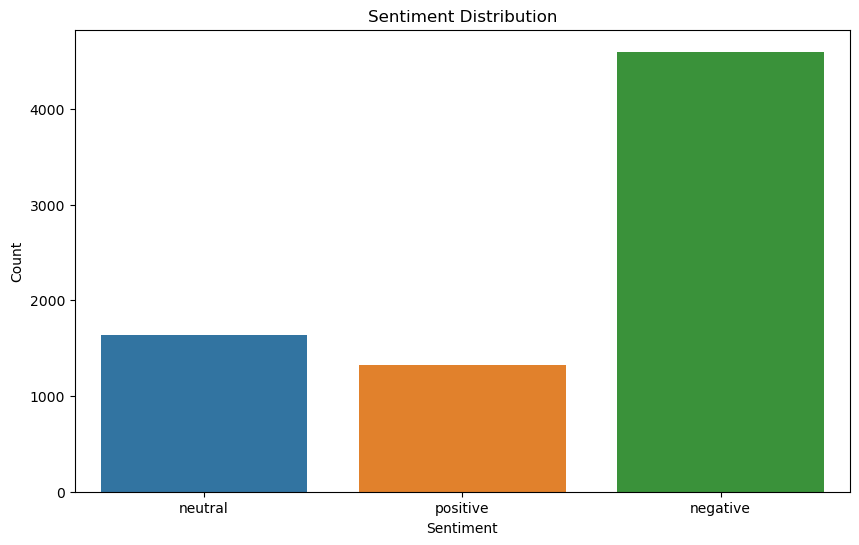

In [26]:
# Visualizing Sentiment Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df1, x='Airline_Sentiment')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()



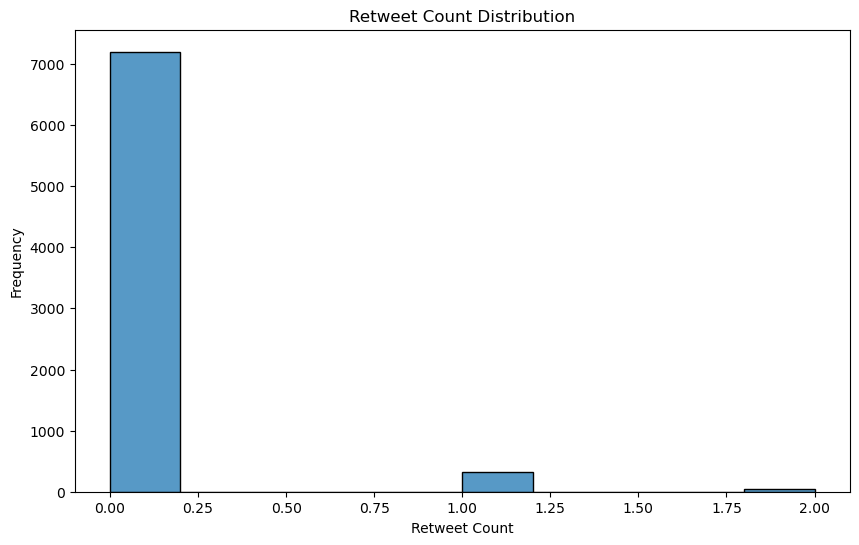

In [27]:
# Retweet Count Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df1['Retweet_Count'], kde=False, bins=10)
plt.title('Retweet Count Distribution')
plt.xlabel('Retweet Count')
plt.ylabel('Frequency')
plt.show()

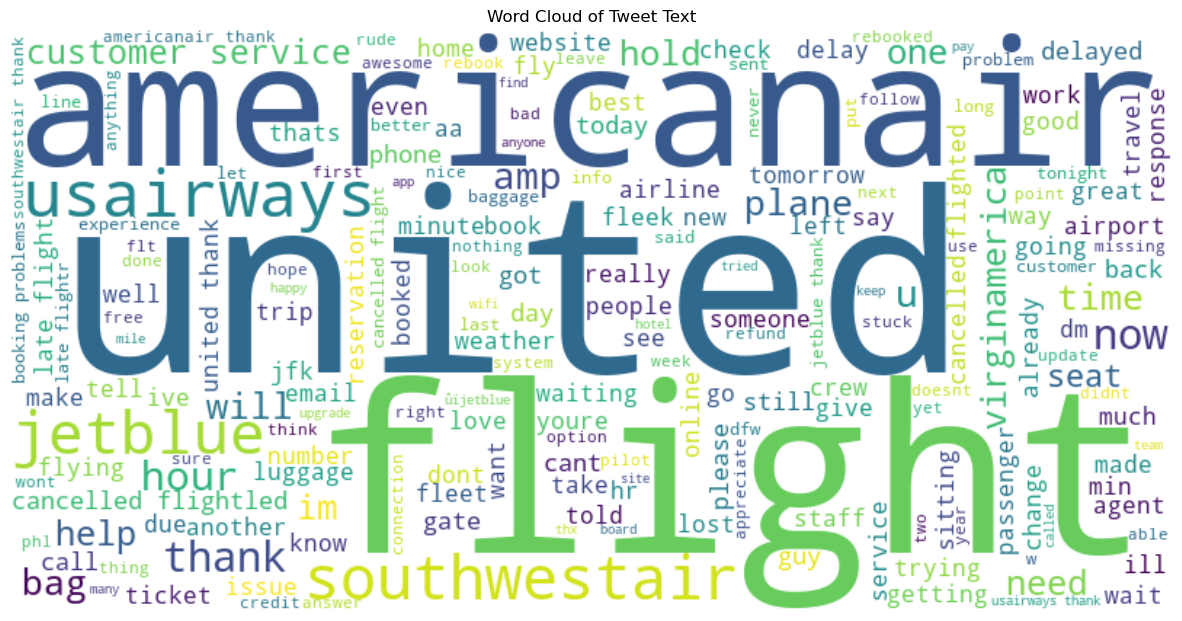

In [28]:
# Text Analysis - Word Cloud
from wordcloud import WordCloud

Text = ' '.join(df1['Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(Text)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Tweet Text')
plt.axis('off')
plt.show()

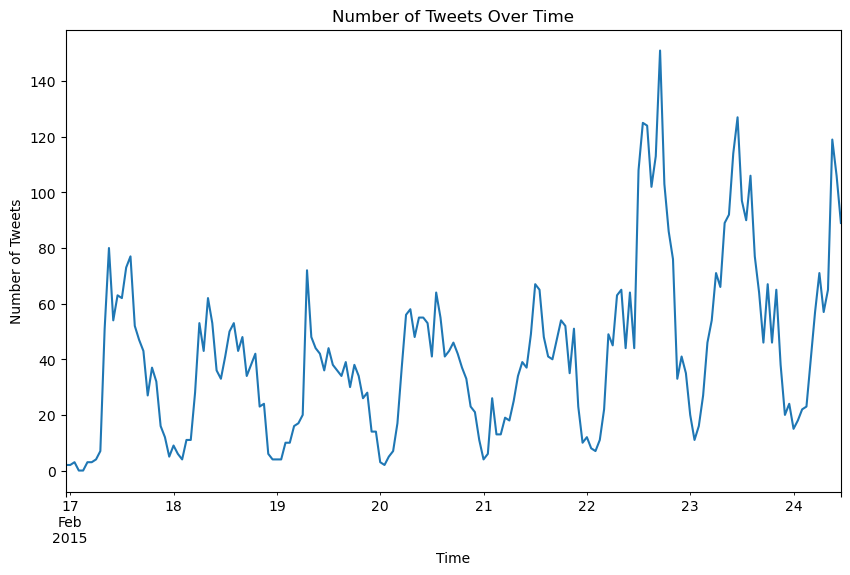

In [29]:
# Temporal Analysis - Tweets Over Time
plt.figure(figsize=(10, 6))
df1.set_index('Tweet_Created').resample('H').size().plot()
plt.title('Number of Tweets Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Tweets')
plt.show()

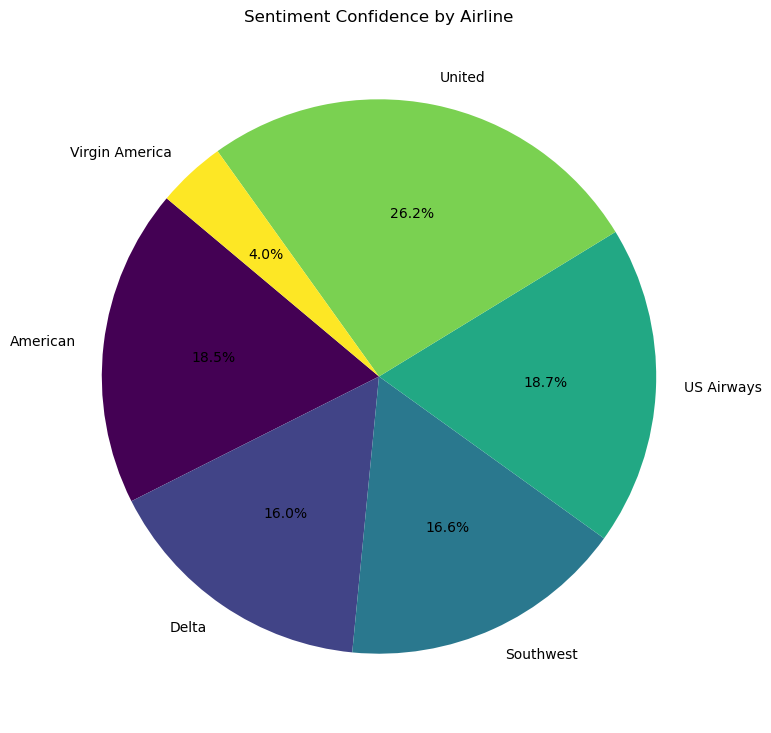

In [30]:
# Aggregating sentiment confidence by airline
sentiment_confidence_by_airline = df1.groupby('Airline')['Airline_SentimentConfidence'].sum()

# Pie Chart of Sentiment Confidence by Airline
plt.figure(figsize=(16, 9))
sentiment_confidence_by_airline.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='viridis')
plt.title('Sentiment Confidence by Airline')
plt.ylabel('')
plt.show()

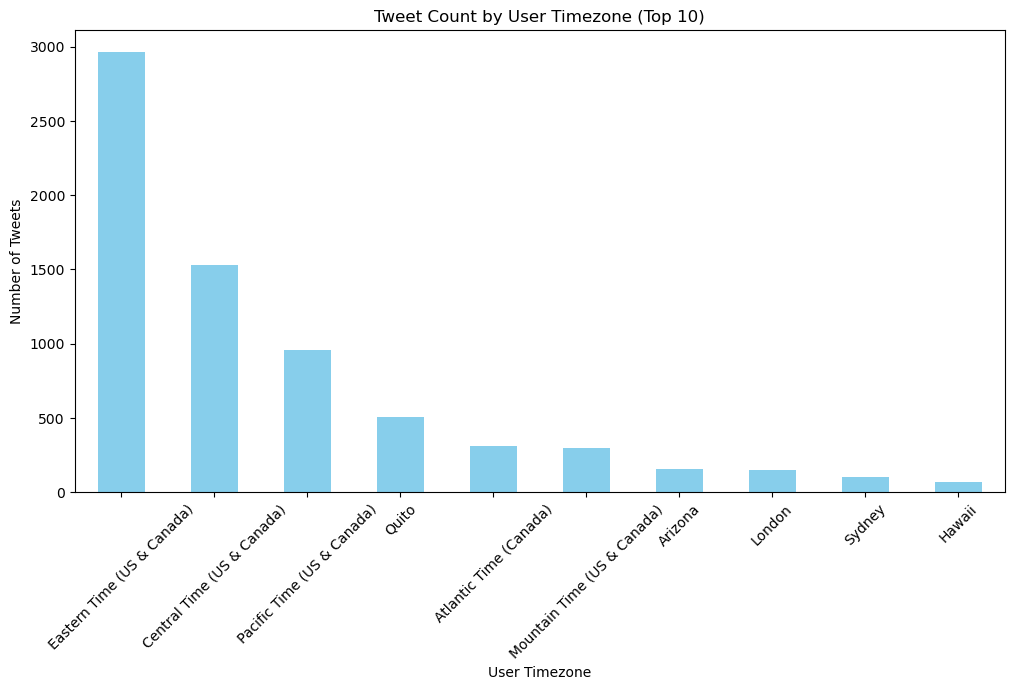

In [31]:
# Calculate tweet count by timezone
tweet_count_by_timezone = df1['User_Timezone'].value_counts()

# Get the top 10 timezones
top_10_timezones = tweet_count_by_timezone.head(10)

# Plot the top 10 timezones
plt.figure(figsize=(12, 6))
top_10_timezones.plot(kind='bar', color='skyblue')
plt.title('Tweet Count by User Timezone (Top 10)')
plt.xlabel('User Timezone')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.show()

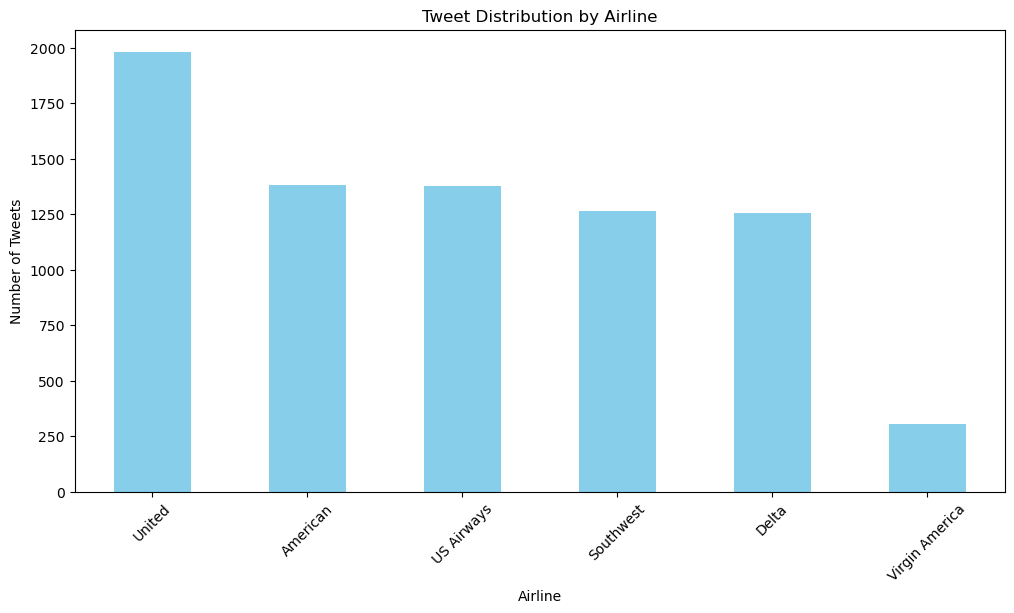

In [32]:
# Count the number of tweets for each airline
tweet_count_by_airline = df1['Airline'].value_counts()

# Plot the tweet distribution by airline
plt.figure(figsize=(12, 6))
tweet_count_by_airline.plot(kind='bar', color='skyblue')
plt.title('Tweet Distribution by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.show()

# Sentiment Analysis

In [33]:
# Function to fix encoding issues
def fix_encoding(text):
    if isinstance(text, str):
        try:
            return text.encode('latin1').decode('utf-8', errors='ignore')
        except UnicodeEncodeError:
            return text
    return text

# Apply the function to the entire DataFrame
df1 = df1.applymap(fix_encoding)


In [34]:
#tokenizating my dataset

def tokenize_text(Text):
    try:
        Text = str(Text)
        tokens = word_tokenize(Text)
        return tokens
    except Exception as e:
        print(f"Error tokenizing text: {e}")
        return []
df1['tokens'] = df1['Text'].apply(tokenize_text)
df1.head()

,Unit_Id,Golden,Unit_State,Trusted_Judgments,Last_JudgmentDate,Airline_Sentiment,Airline_SentimentConfidence,Airline,Name,Retweet_Count,Text,Tweet_Created,Tweet_Id,Tweet_Location,User_Timezone,tokens
2,681448156,False,finalized,3,2015-02-25 10:01:00,neutral,0.6837,Virgin America,yvonnalynn,0,virginamerica i didnt today must mean i need t...,2015-02-24 11:15:00,5.703010e+17,Lets Play,Central Time (US & Canada),"[virginamerica, i, didnt, today, must, mean, i..."
6,681448165,False,finalized,3,2015-02-25 08:11:00,positive,0.6745,Virgin America,cjmcginnis,0,virginamerica yes nearly every time i fly vx t...,2015-02-24 11:13:00,5.703010e+17,San Francisco CA,Pacific Time (US & Canada),"[virginamerica, yes, nearly, every, time, i, f..."
7,681448167,False,finalized,3,2015-02-25 02:11:00,neutral,0.6340,Virgin America,pilot,0,virginamerica really missed a prime opportunit...,2015-02-24 11:12:00,5.703000e+17,Los Angeles,Pacific Time (US & Canada),"[virginamerica, really, missed, a, prime, oppo..."
8,681448169,False,finalized,3,2015-02-25 09:01:00,positive,0.6559,Virgin America,dhepburn,0,virginamerica well i didnt_but now i do d,2015-02-24 11:11:00,5.703000e+17,San Diego,Pacific Time (US & Canada),"[virginamerica, well, i, didnt_but, now, i, do..."
9,681448171,False,finalized,3,2015-02-25 04:15:00,positive,1.0000,Virgin America,YupitsTate,0,virginamerica it was amazing and arrived an ho...,2015-02-24 10:53:00,5.702950e+17,Los Angeles,Eastern Time (US & Canada),"[virginamerica, it, was, amazing, and, arrived..."


In [35]:
#showing just a randow row
sample = df1.iloc[2]['Text']
print(sample)


virginamerica really missed a prime opportunity for men without hats parody there httpstcomwpg7grezp


In [36]:
token= nltk.word_tokenize(sample)
token[:10]


['virginamerica',
 'really',
 'missed',
 'a',
 'prime',
 'opportunity',
 'for',
 'men',
 'without',
 'hats']

In [37]:
#get the polarity score on my sample row
sia = SentimentIntensityAnalyzer()
sia.polarity_scores(sample)

{'neg': 0.16, 'neu': 0.643, 'pos': 0.197, 'compound': 0.1458}

In [38]:
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores and classification
def get_sentiment_scores(text):
    scores = analyzer.polarity_scores(text)
    compound = scores['compound']
    if compound >= 0.05:
        sentiment = 'positive'
    elif compound <= -0.05:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'
    scores['sentiment'] = sentiment
    return scores

# Apply the function to get sentiment scores for each row
df1_sentiment = df1['Text'].apply(get_sentiment_scores).apply(pd.Series)

# Concatenate the sentiment scores with the original DataFrame
df1 = pd.concat([df1, df1_sentiment], axis=1)

# Display the DataFrame with sentiment scores and classifications
df1.head()

,Unit_Id,Golden,Unit_State,Trusted_Judgments,Last_JudgmentDate,Airline_Sentiment,Airline_SentimentConfidence,Airline,Name,Retweet_Count,...,Tweet_Created,Tweet_Id,Tweet_Location,User_Timezone,tokens,neg,neu,pos,compound,sentiment
2,681448156,False,finalized,3,2015-02-25 10:01:00,neutral,0.6837,Virgin America,yvonnalynn,0,...,2015-02-24 11:15:00,5.703010e+17,Lets Play,Central Time (US & Canada),"[virginamerica, i, didnt, today, must, mean, i...",0.00,1.000,0.000,0.0000,neutral
6,681448165,False,finalized,3,2015-02-25 08:11:00,positive,0.6745,Virgin America,cjmcginnis,0,...,2015-02-24 11:13:00,5.703010e+17,San Francisco CA,Pacific Time (US & Canada),"[virginamerica, yes, nearly, every, time, i, f...",0.00,0.816,0.184,0.4019,positive
7,681448167,False,finalized,3,2015-02-25 02:11:00,neutral,0.6340,Virgin America,pilot,0,...,2015-02-24 11:12:00,5.703000e+17,Los Angeles,Pacific Time (US & Canada),"[virginamerica, really, missed, a, prime, oppo...",0.16,0.643,0.197,0.1458,positive
8,681448169,False,finalized,3,2015-02-25 09:01:00,positive,0.6559,Virgin America,dhepburn,0,...,2015-02-24 11:11:00,5.703000e+17,San Diego,Pacific Time (US & Canada),"[virginamerica, well, i, didnt_but, now, i, do...",0.00,0.656,0.344,0.2732,positive
9,681448171,False,finalized,3,2015-02-25 04:15:00,positive,1.0000,Virgin America,YupitsTate,0,...,2015-02-24 10:53:00,5.702950e+17,Los Angeles,Eastern Time (US & Canada),"[virginamerica, it, was, amazing, and, arrived...",0.00,0.642,0.358,0.7717,positive


In [39]:
# Save the cleaned dataset to DataFrame 
df1.to_csv('Cleaned_Airline-Sentiment.csv', index=False)

# Data Pre-processing - Secondary Dataset

In [40]:
# Reading the CSV for dataset 2
try:
    df2 = pd.read_csv("US_Monthly_Air_Passengers.csv")
    print("CSV file loaded successfully.")
except FileNotFoundError:
    print("The specified file was not found.")

# Display the first few rows of the dataframe to verify
df2.head()

CSV file loaded successfully.


,Sum_PASSENGERS,AIRLINE_ID,CARRIER_NAME,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ORIGIN_COUNTRY,ORIGIN_COUNTRY_NAME,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEST_COUNTRY,DEST_COUNTRY_NAME,YEAR,MONTH
0,0,NaN,NaN,AEX,"Alexandria, LA",LA,Louisiana,US,United States,AEX,"Alexandria, LA",LA,Louisiana,US,United States,2015,3
1,0,NaN,NaN,AEX,"Alexandria, LA",LA,Louisiana,US,United States,AFW,"Dallas/Fort Worth, TX",TX,Texas,US,United States,2015,4
2,0,NaN,NaN,AEX,"Alexandria, LA",LA,Louisiana,US,United States,ATL,"Atlanta, GA",GA,Georgia,US,United States,2015,3
3,89,NaN,NaN,AEX,"Alexandria, LA",LA,Louisiana,US,United States,BOG,"Bogota, Colombia",NaN,NaN,CO,Colombia,2015,1
4,108,NaN,NaN,AEX,"Alexandria, LA",LA,Louisiana,US,United States,BOG,"Bogota, Colombia",NaN,NaN,CO,Colombia,2015,3


In [41]:
# Get the kast 5 rows
df2.tail()

,Sum_PASSENGERS,AIRLINE_ID,CARRIER_NAME,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ORIGIN_COUNTRY,ORIGIN_COUNTRY_NAME,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEST_COUNTRY,DEST_COUNTRY_NAME,YEAR,MONTH
6278815,5,22074.0,Avon Jet AG,MFE,"Mission/McAllen/Edinburg, TX",TX,Texas,US,United States,VCE,"Venice, Italy",NaN,NaN,IT,Italy,2020,3
6278816,2,22074.0,Avon Jet AG,PBI,"West Palm Beach/Palm Beach, FL",FL,Florida,US,United States,FAB,"Farnborough, United Kingdom",NaN,NaN,GB,United Kingdom,2020,3
6278817,6,22074.0,Avon Jet AG,TEB,"Teterboro, NJ",NJ,New Jersey,US,United States,ATH,"Athens, Greece",NaN,NaN,GR,Greece,2020,7
6278818,3,22074.0,Avon Jet AG,TEB,"Teterboro, NJ",NJ,New Jersey,US,United States,FRA,"Frankfurt, Germany",NaN,NaN,DE,Germany,2020,10
6278819,2,22074.0,Avon Jet AG,TEB,"Teterboro, NJ",NJ,New Jersey,US,United States,KEF,"Keflavik/Reykjavik, Iceland",NaN,NaN,IS,Iceland,2020,6


In [42]:
#Show the rows and columns values
df2.shape

(6278820, 17)

In [43]:
#Display the columns names
df2.columns

Index(['Sum_PASSENGERS', 'AIRLINE_ID', 'CARRIER_NAME', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM',
       'ORIGIN_COUNTRY', 'ORIGIN_COUNTRY_NAME', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_NM', 'DEST_COUNTRY', 'DEST_COUNTRY_NAME',
       'YEAR', 'MONTH'],
      dtype='object')

In [44]:
df2.describe

<bound method NDFrame.describe of          Sum_PASSENGERS  AIRLINE_ID CARRIER_NAME ORIGIN  \
0                     0         NaN          NaN    AEX   
1                     0         NaN          NaN    AEX   
2                     0         NaN          NaN    AEX   
3                    89         NaN          NaN    AEX   
4                   108         NaN          NaN    AEX   
...                 ...         ...          ...    ...   
6278815               5     22074.0  Avon Jet AG    MFE   
6278816               2     22074.0  Avon Jet AG    PBI   
6278817               6     22074.0  Avon Jet AG    TEB   
6278818               3     22074.0  Avon Jet AG    TEB   
6278819               2     22074.0  Avon Jet AG    TEB   

                       ORIGIN_CITY_NAME ORIGIN_STATE_ABR ORIGIN_STATE_NM  \
0                        Alexandria, LA               LA       Louisiana   
1                        Alexandria, LA               LA       Louisiana   
2                        Alex

In [45]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6278820 entries, 0 to 6278819
Data columns (total 17 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Sum_PASSENGERS       int64  
 1   AIRLINE_ID           float64
 2   CARRIER_NAME         object 
 3   ORIGIN               object 
 4   ORIGIN_CITY_NAME     object 
 5   ORIGIN_STATE_ABR     object 
 6   ORIGIN_STATE_NM      object 
 7   ORIGIN_COUNTRY       object 
 8   ORIGIN_COUNTRY_NAME  object 
 9   DEST                 object 
 10  DEST_CITY_NAME       object 
 11  DEST_STATE_ABR       object 
 12  DEST_STATE_NM        object 
 13  DEST_COUNTRY         object 
 14  DEST_COUNTRY_NAME    object 
 15  YEAR                 int64  
 16  MONTH                int64  
dtypes: float64(1), int64(3), object(13)
memory usage: 814.4+ MB


In [46]:
# Confirm the data types are in order
df2.dtypes

Sum_PASSENGERS           int64
AIRLINE_ID             float64
CARRIER_NAME            object
ORIGIN                  object
ORIGIN_CITY_NAME        object
ORIGIN_STATE_ABR        object
ORIGIN_STATE_NM         object
ORIGIN_COUNTRY          object
ORIGIN_COUNTRY_NAME     object
DEST                    object
DEST_CITY_NAME          object
DEST_STATE_ABR          object
DEST_STATE_NM           object
DEST_COUNTRY            object
DEST_COUNTRY_NAME       object
YEAR                     int64
MONTH                    int64
dtype: object

In [47]:
# Check for missing values
df2.isna().sum()

Sum_PASSENGERS              0
AIRLINE_ID                448
CARRIER_NAME              448
ORIGIN                      0
ORIGIN_CITY_NAME            0
ORIGIN_STATE_ABR       561441
ORIGIN_STATE_NM        561441
ORIGIN_COUNTRY              2
ORIGIN_COUNTRY_NAME         0
DEST                        0
DEST_CITY_NAME              0
DEST_STATE_ABR         589465
DEST_STATE_NM          589465
DEST_COUNTRY                7
DEST_COUNTRY_NAME           0
YEAR                        0
MONTH                       0
dtype: int64

In [48]:
# Remove columns with high missing values that are not necessary for analysis

try: 
    columns_to_drop = ['ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM','DEST_STATE_ABR', 'DEST_STATE_NM']
    df2 = df2.drop(columns=columns_to_drop)
except: 
    print("Columns are either deleted earlier or not existing")

df2.head()

,Sum_PASSENGERS,AIRLINE_ID,CARRIER_NAME,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_COUNTRY,ORIGIN_COUNTRY_NAME,DEST,DEST_CITY_NAME,DEST_COUNTRY,DEST_COUNTRY_NAME,YEAR,MONTH
0,0,NaN,NaN,AEX,"Alexandria, LA",US,United States,AEX,"Alexandria, LA",US,United States,2015,3
1,0,NaN,NaN,AEX,"Alexandria, LA",US,United States,AFW,"Dallas/Fort Worth, TX",US,United States,2015,4
2,0,NaN,NaN,AEX,"Alexandria, LA",US,United States,ATL,"Atlanta, GA",US,United States,2015,3
3,89,NaN,NaN,AEX,"Alexandria, LA",US,United States,BOG,"Bogota, Colombia",CO,Colombia,2015,1
4,108,NaN,NaN,AEX,"Alexandria, LA",US,United States,BOG,"Bogota, Colombia",CO,Colombia,2015,3


In [49]:
# Since we have large datasets, we will not remove any columns with high missing

# Drop rows with missing values
df2 = df2.dropna()

In [50]:
# Check again for missing values ae all removed
df2.isna().sum()

Sum_PASSENGERS         0
AIRLINE_ID             0
CARRIER_NAME           0
ORIGIN                 0
ORIGIN_CITY_NAME       0
ORIGIN_COUNTRY         0
ORIGIN_COUNTRY_NAME    0
DEST                   0
DEST_CITY_NAME         0
DEST_COUNTRY           0
DEST_COUNTRY_NAME      0
YEAR                   0
MONTH                  0
dtype: int64

In [51]:
numerical_cols = ['Sum_PASSENGERS', 'AIRLINE_ID', 'YEAR', 'MONTH']

In [52]:
# Display the cleaned DataFrame
df2.head()

,Sum_PASSENGERS,AIRLINE_ID,CARRIER_NAME,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_COUNTRY,ORIGIN_COUNTRY_NAME,DEST,DEST_CITY_NAME,DEST_COUNTRY,DEST_COUNTRY_NAME,YEAR,MONTH
448,130,19385.0,Reeve Aleutian Airways Inc.,ADK,"Adak Island, AK",US,United States,ANC,"Anchorage, AK",US,United States,2000,1
449,196,19385.0,Reeve Aleutian Airways Inc.,ADK,"Adak Island, AK",US,United States,ANC,"Anchorage, AK",US,United States,2000,2
450,198,19385.0,Reeve Aleutian Airways Inc.,ADK,"Adak Island, AK",US,United States,ANC,"Anchorage, AK",US,United States,2000,3
451,155,19385.0,Reeve Aleutian Airways Inc.,ADK,"Adak Island, AK",US,United States,ANC,"Anchorage, AK",US,United States,2000,4
452,167,19385.0,Reeve Aleutian Airways Inc.,ADK,"Adak Island, AK",US,United States,ANC,"Anchorage, AK",US,United States,2000,5


In [53]:
#Check the columns and rows again

df2.shape

(6278363, 13)

In [54]:
# Identify outliers using z-scores 

from scipy.stats import zscore

# Calculate z-scores for numerical columns
z_scores = df2[numerical_cols].apply(zscore)

# Identify outliers with z-scores > 3 or < -3
outliers = (z_scores > 3) | (z_scores < -3)

# Display columns with outliers
outlier_columns = outliers.any()
print("Columns with outliers:", outlier_columns[outlier_columns].index.tolist())

# Display the rows that contain outliers
outlier_rows = df2[outliers.any(axis=1)]
print("Rows with outliers:")
print(outlier_rows)

Columns with outliers: ['Sum_PASSENGERS', 'AIRLINE_ID']
Rows with outliers:
         Sum_PASSENGERS  AIRLINE_ID             CARRIER_NAME ORIGIN  \
2059              26033     19386.0  Northwest Airlines Inc.    AMS   
2060              25287     19386.0  Northwest Airlines Inc.    AMS   
2061              36787     19386.0  Northwest Airlines Inc.    AMS   
2062              40335     19386.0  Northwest Airlines Inc.    AMS   
2063              35843     19386.0  Northwest Airlines Inc.    AMS   
...                 ...         ...                      ...    ...   
6278815               5     22074.0              Avon Jet AG    MFE   
6278816               2     22074.0              Avon Jet AG    PBI   
6278817               6     22074.0              Avon Jet AG    TEB   
6278818               3     22074.0              Avon Jet AG    TEB   
6278819               2     22074.0              Avon Jet AG    TEB   

                       ORIGIN_CITY_NAME ORIGIN_COUNTRY ORIGIN_COUNTRY_N

In [55]:
#Removing Outliers
from scipy.stats import zscore

# Calculate z-scores for numerical columns
z_scores = df2[numerical_cols].apply(zscore)

# Identify rows where any value has a z-score > 3 or < -3
outliers = (z_scores > 3) | (z_scores < -3)
outlier_indices = outliers.any(axis=1)

# Remove outliers
df2 = df2[~outlier_indices]

print("DataFrame after removing outliers:")
print(df2)

DataFrame after removing outliers:
         Sum_PASSENGERS  AIRLINE_ID                 CARRIER_NAME ORIGIN  \
448                 130     19385.0  Reeve Aleutian Airways Inc.    ADK   
449                 196     19385.0  Reeve Aleutian Airways Inc.    ADK   
450                 198     19385.0  Reeve Aleutian Airways Inc.    ADK   
451                 155     19385.0  Reeve Aleutian Airways Inc.    ADK   
452                 167     19385.0  Reeve Aleutian Airways Inc.    ADK   
...                 ...         ...                          ...    ...   
6174117               0     21427.0               AeroLogic GmbH    YYZ   
6174118               0     21427.0               AeroLogic GmbH    YYZ   
6174119               0     21427.0               AeroLogic GmbH    YYZ   
6174120               0     21427.0               AeroLogic GmbH    YYZ   
6174121               0     21427.0               AeroLogic GmbH    YYZ   

        ORIGIN_CITY_NAME ORIGIN_COUNTRY ORIGIN_COUNTRY_NAME DEST

In [56]:
df2.head()

,Sum_PASSENGERS,AIRLINE_ID,CARRIER_NAME,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_COUNTRY,ORIGIN_COUNTRY_NAME,DEST,DEST_CITY_NAME,DEST_COUNTRY,DEST_COUNTRY_NAME,YEAR,MONTH
448,130,19385.0,Reeve Aleutian Airways Inc.,ADK,"Adak Island, AK",US,United States,ANC,"Anchorage, AK",US,United States,2000,1
449,196,19385.0,Reeve Aleutian Airways Inc.,ADK,"Adak Island, AK",US,United States,ANC,"Anchorage, AK",US,United States,2000,2
450,198,19385.0,Reeve Aleutian Airways Inc.,ADK,"Adak Island, AK",US,United States,ANC,"Anchorage, AK",US,United States,2000,3
451,155,19385.0,Reeve Aleutian Airways Inc.,ADK,"Adak Island, AK",US,United States,ANC,"Anchorage, AK",US,United States,2000,4
452,167,19385.0,Reeve Aleutian Airways Inc.,ADK,"Adak Island, AK",US,United States,ANC,"Anchorage, AK",US,United States,2000,5


# Exploratory Data Analysis for Dataset 2


Distribution of Passengers Over Time:
YEAR  MONTH
2000  1        39845958
      2        40215675
      3        44422516
      4        43193506
      5        44378534
                 ...   
2020  6        16504689
      7        23467237
      8        24604859
      9        23896323
      10       27454247
Name: Sum_PASSENGERS, Length: 250, dtype: int64


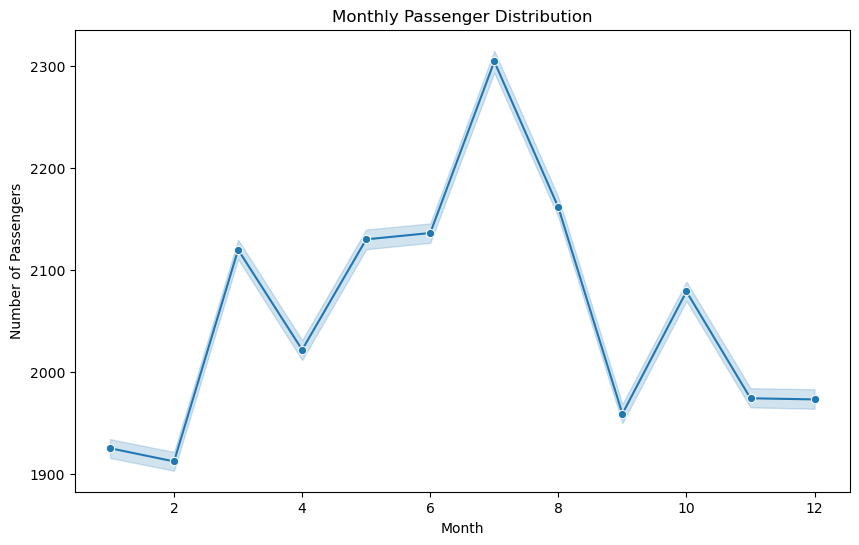

In [57]:
# Analyze the distribution of passengers over time
print("\nDistribution of Passengers Over Time:")
print(df2.groupby(['YEAR', 'MONTH'])['Sum_PASSENGERS'].sum())

# Plot the distribution of passengers over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df2, x='MONTH', y='Sum_PASSENGERS', marker='o')
plt.title('Monthly Passenger Distribution')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.show()


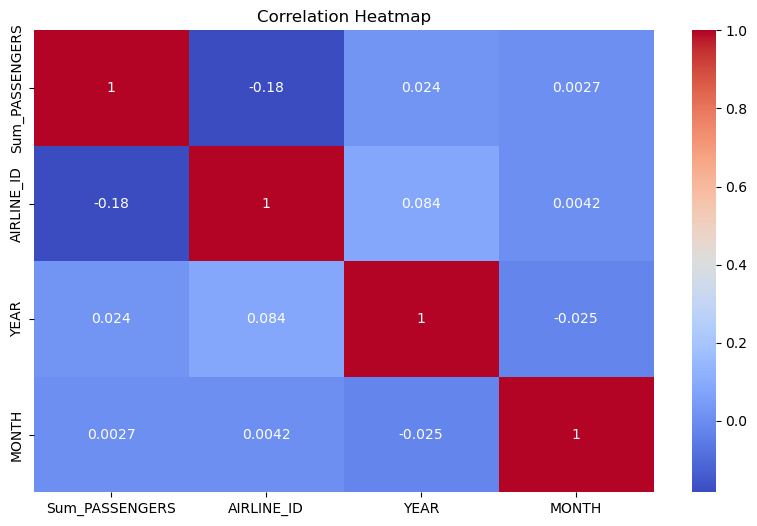

In [58]:
# Select only numeric columns for the heatmap
numeric_cols = df2.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df2[numeric_cols]

# Generate the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

             DEST_CITY_NAME  Flight_Count
569             Chicago, IL        176889
2004           New York, NY        151677
3049         Washington, DC        123621
154             Atlanta, GA        114211
1638        Los Angeles, CA        113205
1238            Houston, TX        111820
1818              Miami, FL        109175
783              Denver, CO        105985
790             Detroit, MI        100358
734   Dallas/Fort Worth, TX         96948


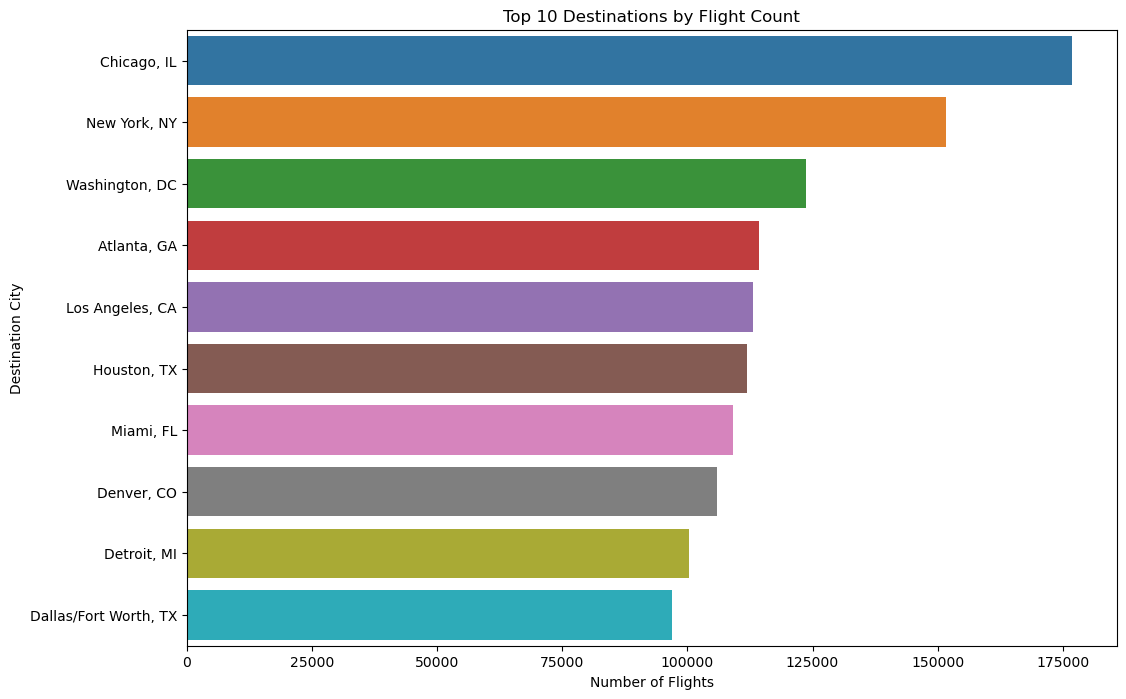

In [59]:
# Count the number of flights per destination
flight_counts = df2.groupby('DEST_CITY_NAME').size().reset_index(name='Flight_Count')

# Sort by flight count in descending order and get the top 10 destinations
top_10_destinations = flight_counts.sort_values(by='Flight_Count', ascending=False).head(10)
print(top_10_destinations)

# Plot top 10 destinations by flight count
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_destinations, x='Flight_Count', y='DEST_CITY_NAME')
plt.title('Top 10 Destinations by Flight Count')
plt.xlabel('Number of Flights')
plt.ylabel('Destination City')
plt.show()

In [60]:
# Save the cleaned dataset to DataFrame 
df2.to_csv('Cleaned_US_Monthly_Air_Passengers.csv', index=False)

In [61]:
df2.dtypes

Sum_PASSENGERS           int64
AIRLINE_ID             float64
CARRIER_NAME            object
ORIGIN                  object
ORIGIN_CITY_NAME        object
ORIGIN_COUNTRY          object
ORIGIN_COUNTRY_NAME     object
DEST                    object
DEST_CITY_NAME          object
DEST_COUNTRY            object
DEST_COUNTRY_NAME       object
YEAR                     int64
MONTH                    int64
dtype: object

Text(0, 0.5, 'Airline')

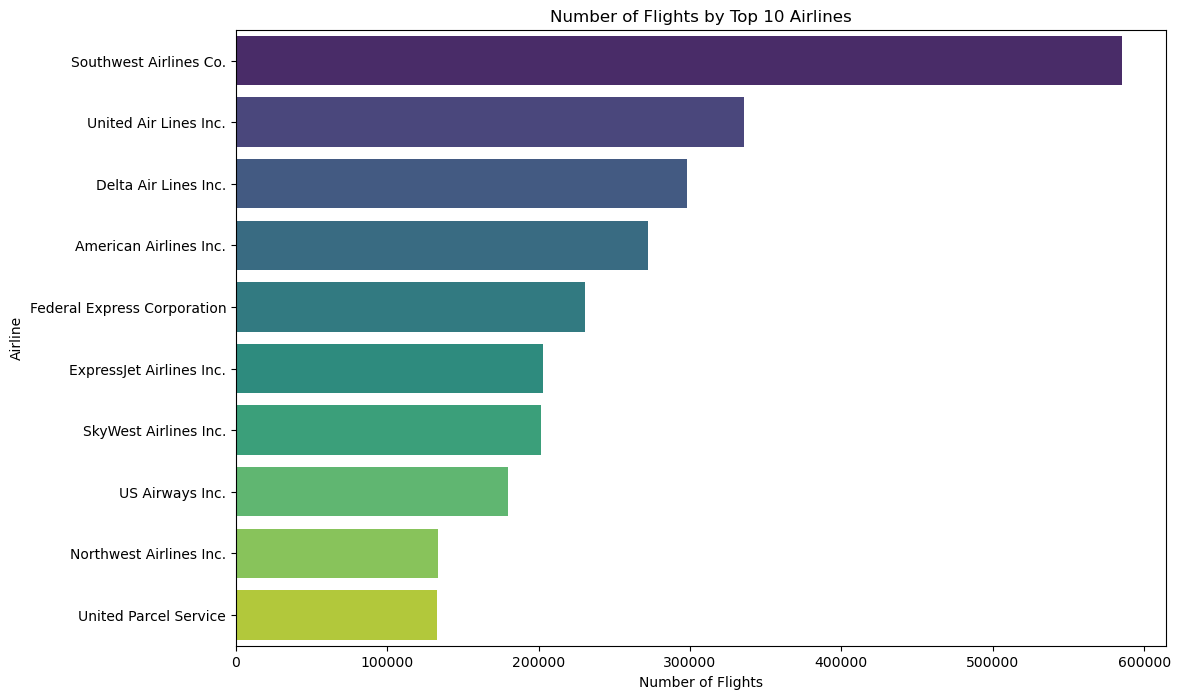

In [62]:
# Assuming df is your DataFrame
# Step 1: Count Flights for Each Airline
airline_flights = df2.groupby('CARRIER_NAME').size().reset_index(name='Flight_Count')

# Step 2: Sort and Select Top 10 Airlines
top_10_airlines = airline_flights.sort_values(by='Flight_Count', ascending=False).head(10)

# Step 3: Plot the Number of Flights for Top 10 Airlines
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_airlines, x='Flight_Count', y='CARRIER_NAME', palette='viridis')
plt.title('Number of Flights by Top 10 Airlines')
plt.xlabel('Number of Flights')
plt.ylabel('Airline')

# Dimensionality Reduction

# Low Variance Filter

In [63]:
# The Low Variance Filter removes columns with very little variance, as they contribute little to no predictive power.

from sklearn.feature_selection import VarianceThreshold

# Define the threshold for variance
low_variance_filter = VarianceThreshold(threshold=0.01)  # Adjust threshold as needed

# Fit the filter to the dataset
df2_low_var = df2.select_dtypes(include=['int64', 'float64'])  # Select only numeric columns
df2_low_var_filtered = low_variance_filter.fit_transform(df2_low_var)

# Get the feature names
low_var_features = df2_low_var.columns[low_variance_filter.get_support()]

print("Low Variance Filter - Important Columns:")
print(low_var_features)


Low Variance Filter - Important Columns:
Index(['Sum_PASSENGERS', 'AIRLINE_ID', 'YEAR', 'MONTH'], dtype='object')


# High Correlation Filter

In [64]:
# The High Correlation Filter removes columns that are highly correlated with each other to avoid multicollinearity.

# Assuming df2 is your original DataFrame
df2_encoded = df2.copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to categorical columns
categorical_columns = df2.select_dtypes(include=['object']).columns

for column in categorical_columns:
    df2_encoded[column] = label_encoder.fit_transform(df2_encoded[column])

# Ensure no missing values are present
df2_encoded.fillna(df2_encoded.mean(), inplace=True)

# Select only numeric columns
numeric_cols = df2_encoded.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df2_encoded[numeric_cols]

# Compute the correlation matrix
corr_matrix = df_numeric.corr()

# Find highly correlated features
threshold = 0.9  # Correlation threshold
high_corr_features = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            high_corr_features.add(colname)

print("High Correlation Filter - Columns to Remove:")
print(high_corr_features)


High Correlation Filter - Columns to Remove:
set()


# Missing Value Ratio

In [65]:
# Missing Value Ratio will identify and remove columns with a high ratio of missing values.

# Calculate missing value ratio
missing_value_ratio = df2.isnull().mean()

# Filter columns with missing value ratio below a threshold
threshold = 0.2  # Example threshold
missing_value_filtered = missing_value_ratio[missing_value_ratio < threshold].index

print("Missing Value Ratio - Columns to Keep:")
print(missing_value_filtered)


Missing Value Ratio - Columns to Keep:
Index(['Sum_PASSENGERS', 'AIRLINE_ID', 'CARRIER_NAME', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'ORIGIN_COUNTRY', 'ORIGIN_COUNTRY_NAME', 'DEST',
       'DEST_CITY_NAME', 'DEST_COUNTRY', 'DEST_COUNTRY_NAME', 'YEAR', 'MONTH'],
      dtype='object')


# Forward Feature Extraction


In [66]:
# Forward Feature Extraction will add features one at a time to find the best subset of features.

# Define model for feature selection
model = LinearRegression()

# Perform forward feature selection
selector = SequentialFeatureSelector(model, n_features_to_select=3, direction='forward')
selector.fit(df2_low_var, df2['Sum_PASSENGERS'])  # Use the target variable of interest

# Get the selected features
selected_features_forward = df2_low_var.columns[selector.get_support()]

print("Forward Feature Extraction - Selected Columns:")
print(selected_features_forward)


Forward Feature Extraction - Selected Columns:
Index(['Sum_PASSENGERS', 'AIRLINE_ID', 'YEAR'], dtype='object')


# Backward Feature Extraction

In [67]:
# Backward Feature Extraction will start with all features and remove one at a time to find the best subset.

# Perform backward feature selection
selector_backward = SequentialFeatureSelector(model, n_features_to_select=3, direction='backward')
selector_backward.fit(df2_low_var, df2['Sum_PASSENGERS'])

# Get the selected features
selected_features_backward = df2_low_var.columns[selector_backward.get_support()]

print("Backward Feature Extraction - Selected Columns:")
print(selected_features_backward)


Backward Feature Extraction - Selected Columns:
Index(['Sum_PASSENGERS', 'YEAR', 'MONTH'], dtype='object')


# Data Mining Algorithms

In [68]:
# Ensure the dataset only contains numeric columns
numeric_cols = df2_encoded.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df2_encoded[numeric_cols]

# Feature and target variables
X = df2_encoded.drop(['Sum_PASSENGERS'], axis=1)
y = df2_encoded['Sum_PASSENGERS']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print feature columns and target column
print("Feature set columns (X Variables) are:", X_train.columns.tolist())
print("\nTarget column (Y Variable) is: ['Sum_PASSENGERS']")


Feature set columns (X Variables) are: ['AIRLINE_ID', 'CARRIER_NAME', 'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_COUNTRY', 'ORIGIN_COUNTRY_NAME', 'DEST', 'DEST_CITY_NAME', 'DEST_COUNTRY', 'DEST_COUNTRY_NAME', 'YEAR', 'MONTH']

Target column (Y Variable) is: ['Sum_PASSENGERS']


In [69]:
# Print the number of rows and columns for X and y
print("\nShape of X (Features) - Rows, Columns:", X.shape)
print("Shape of y (Target) - Rows:", y.shape[0])


Shape of X (Features) - Rows, Columns: (6027912, 12)
Shape of y (Target) - Rows: 6027912


In [75]:
# Check the X_train dataset sample 
X_train[:10]

array([[ 0.52802675,  0.92112761, -0.94342194, -0.89695203,  0.3129171 ,
         0.30274513,  0.92702483,  0.69849141,  0.3211371 ,  0.30973747,
        -0.70270978,  1.01388718],
       [ 0.68966097, -1.36433134,  1.08427375,  0.97190679,  0.3129171 ,
         0.30274513,  0.00747366, -0.01189785,  0.3211371 ,  0.30973747,
         0.69867962,  0.14805812],
       [ 0.82603984,  1.03573765,  0.40635758,  0.33028556,  0.3129171 ,
         0.30274513,  0.45485334,  0.43323388,  0.3211371 ,  0.30973747,
         1.74972167,  0.72527749],
       [ 0.8235143 ,  0.88741878, -1.68065578, -1.59823065,  0.3129171 ,
         0.30274513,  1.06788745,  1.0218096 ,  0.3211371 ,  0.30973747,
        -0.5275361 ,  1.01388718],
       [-0.77009804, -0.68341289, -1.32474979, -1.37908108,  0.3129171 ,
         0.30274513,  0.00972747,  0.08259303,  0.3211371 ,  0.30973747,
        -0.70270978, -0.14055157],
       [ 0.76542701, -1.32388074,  0.73805228, -1.14532154,  0.3129171 ,
         0.30274513,  

# Linear Regression Model

In [71]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = lr_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Linear Regression MSE: {mse}")
print(f"Linear Regression MAE: {mae}")
print(f"Linear Regression R^2: {r2}")

Linear Regression MSE: 11834177.34906112
Linear Regression MAE: 2398.9745304919215
Linear Regression R^2: 0.04013085127664673


# Decision Tree Regression Model

In [72]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_model.predict(X_test)

# Calculate metrics
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Print metrics
print(f"Decision Tree Regression MSE: {mse_dt}")
print(f"Decision Tree Regression MAE: {mae_dt}")
print(f"Decision Tree Regression R^2: {r2_dt}")


Decision Tree Regression MSE: 788975.6087677082
Decision Tree Regression MAE: 365.9844830260546
Decision Tree Regression R^2: 0.9360062534459624


# Neural Network Model

In [73]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import time

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the Neural Network Model with early stopping and reduced hidden layers
nn_model = MLPRegressor(
    hidden_layer_sizes=(64, 32),  # Smaller hidden layer sizes
    activation='relu',
    solver='adam',
    max_iter=100,  # Reduced maximum iterations
    random_state=42,
    early_stopping=True,  # Enable early stopping
    validation_fraction=0.1  # Fraction of training data used for validation
)

# Train the model
start = time.time()
nn_model.fit(X_train, y_train)
end = time.time()

# Predictions
y_pred_nn = nn_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred_nn)
mae = mean_absolute_error(y_test, y_pred_nn)
r2 = r2_score(y_test, y_pred_nn)

# Print metrics and training time
print(f"Neural Network MSE: {mse}")
print(f"Neural Network MAE: {mae}")
print(f"Neural Network R^2: {r2}")


C:\Users\olanr\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network MSE: 9630311.670529196
Neural Network MAE: 2056.2159201855607
Neural Network R^2: 0.21888621469199077


# Model Evaluation

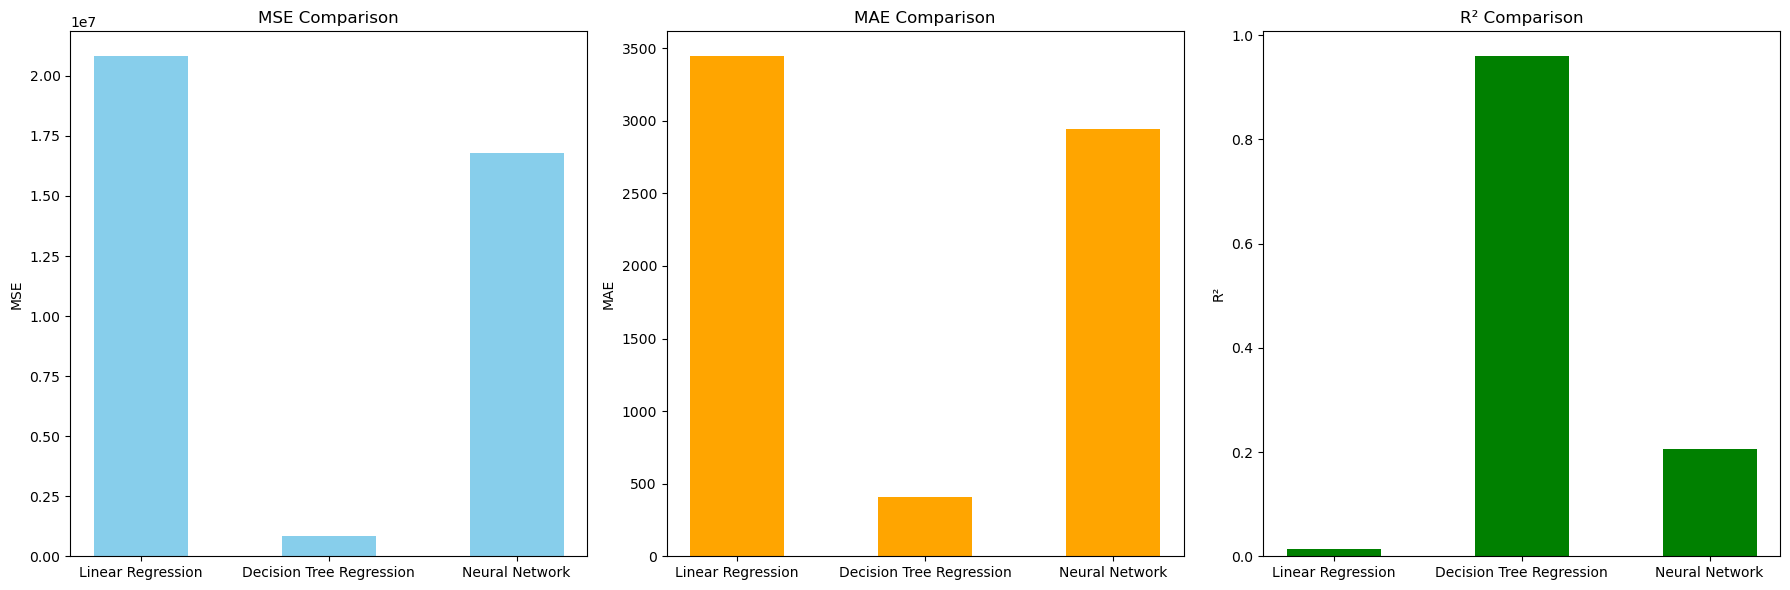

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Performance metrics
models = ['Linear Regression', 'Decision Tree Regression', 'Neural Network']
mse = [20814764.32, 853161.66, 16783540.32]
mae = [3444.42, 408.24, 2943.95]
r2 = [0.0149, 0.9596, 0.2057]

x = np.arange(len(models))  # the label locations
width = 0.5  # the width of the bars

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plotting MSE
axs[0].bar(x, mse, width, color='skyblue')
axs[0].set_title('MSE Comparison')
axs[0].set_xticks(x)
axs[0].set_xticklabels(models)
axs[0].set_ylabel('MSE')

# Plotting MAE
axs[1].bar(x, mae, width, color='orange')
axs[1].set_title('MAE Comparison')
axs[1].set_xticks(x)
axs[1].set_xticklabels(models)
axs[1].set_ylabel('MAE')

# Plotting R²
axs[2].bar(x, r2, width, color='green')
axs[2].set_title('R² Comparison')
axs[2].set_xticks(x)
axs[2].set_xticklabels(models)
axs[2].set_ylabel('R²')

plt.tight_layout()
plt.show()


# Comparison

#### Mean Squared Error (MSE): Lower values indicate better performance as the model's predictions are closer to the actual values. The Decision Tree Regression has the lowest MSE (853,161.66), followed by the Neural Network and Linear Regression with significantly higher values.

#### Mean Absolute Error (MAE): Similar to MSE, lower MAE values indicate better performance. The Decision Tree Regression also has the lowest MAE (408.24), indicating it makes fewer errors on average compared to the other models.

#### R-squared (R²): This metric indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. The closer the R² value is to 1, the better the model fits the data. The Decision Tree Regression has an R² value of 0.9596, indicating a very good fit. In contrast, the Neural Network and Linear Regression models have much lower R² values, indicating they do not fit the data as well.

# Best Model Selection

#### Based on the comparison, the Decision Tree Regression model is the best among the three. It has the lowest MSE and MAE, indicating that its predictions are the closest to the actual values and have the least average error. Additionally, it has the highest R² value, which means it explains the most variance in the data compared to the other models. This suggests that the Decision Tree Regression model is the most accurate and reliable for this dataset.

# Questions

#### Question 1: How has the total number of passengers evolved over the years, and are there any notable trends or seasonal patterns?

#### Question 2: Which airlines have the highest and lowest passenger counts, and how does this distribution look?

#### Question 3: How do passenger vary between different origins and destinations, and which routes are the most and least popular?